In [28]:
#导入所需的库
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [29]:
# 随机生成聚类中心点  
#参数：dataSet-List列表，已分类点坐标
#      k-整数，近邻数量
#返回值：centroids-2维列表，k个随机中心点坐标
def initCentroids(dataSet, k):  
    numSamples, dim = dataSet.shape  
    centroids = np.zeros((k, dim))  
    for i in range(k):  
        index = int(np.random.uniform(0, numSamples))  
        centroids[i, :] = dataSet[index, :]  
    return centroids

In [30]:
# 2维平面显示聚类结果
#参数：dataSet-List列表，样本集
#      k-整数，近邻数量
#      centroids-List列表，聚类中心点坐标
#      clusterAssment-List列表，聚类结果
#返回值：无
def showCluster(dataSet, k, centroids, clusterAssment):  
    fig_2d_clustered=plt.figure()
    ax2d_clustered=fig_2d_clustered.add_subplot(111) 

    numSamples, dim = dataSet.shape  
    if dim != 2:  
        print("只能绘制2维图形")  
        return 1  
#创建数据点标记格式控制列表，实现数据点区别输出
    mark = ['.r', '+b', '*g', '1k', '^r', 'vr', 'sr', 'dr', '<r', 'pr']  
    if k > len(mark):  
        print("K值过大！")  
        return 1  
#绘制所有样本点
    for i in range(numSamples):  
        markIndex = int(clusterAssment[i])  
        ax2d_clustered.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])  

#绘制聚类中心点  
    for i in range(k):
        ax2d_clustered.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize = 20)  

    fig_2d_clustered.savefig('clusterRes.png', dpi=300, bbox_inches='tight')
    fig_2d_clustered.show()

In [31]:
# 计算欧式距离，即两点间的直线距离 
#参数：vector1-List列表，n维属性坐标值构成的向量
#      vector2-List列表，n维属性坐标值构成的向量
#返回值：浮点数，欧式距离

def euclDistance(vector1, vector2):  
    return np.sqrt(np.sum(np.power(vector2 - vector1, 2))) 

In [32]:
# KNN分类算法函数实现
#参数：newInput-List列表，待分类的数据点
#      dataSet-List列表，已分类点坐标
#      lables-List列表，分类标签
#      k-整数，近邻数量
#返回值：maxIndex-字符，分类结果
def kNNClassify(newInputs, dataSet, labels, k):
    numSamples = dataSet.shape[0]   # shape[0]表示行数
    numInputs = newInputs.shape[0]
    distance = np.zeros((numInputs, numSamples))
#计算newInput与dataSet中个点的距离，放入distance列表内
    for i,INput in enumerate(newInputs):
        for j,vec in enumerate(dataSet):
            distance[i,j] = euclDistance(INput,vec)       
#对距离排序
    sortedDistIndices = np.argsort(distance)
    classCount = np.zeros((numInputs,3))
#选择k个最近邻
    for i in range(numInputs):
        voteLabel = labels[sortedDistIndices[i,0:k]]
        knear = np.array([np.sum(voteLabel == 0),np.sum(voteLabel == 1),np.sum(voteLabel == 2)])
        classCount[i] = knear
    return classCount.argmax(axis=1)

In [33]:
X_origin = pd.read_csv('ch11_Mall_Customers.csv',encoding='gb2312')
print('原始数据头5行：')
print(X_origin.shape)
print(X_origin.head())

#数据规格化
X = X_origin.drop(['ID','性别'],axis=1)
X_scaled = preprocessing.scale(X)
X_scaled_frame = pd.DataFrame(X_scaled,columns=['atr1','atr2','atr3'])
print('规格化转换后数据：')
print(X_scaled_frame.head())

#压缩数据为2个主成分
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca_frame = pd.DataFrame(X_pca,columns=['pca_1','pca_2'])
print(X_pca_frame.head())

原始数据头5行：
(200, 5)
   ID      性别  年龄  年收入(万元)  消费评分(1-100)
0   1    Male  19       15           39
1   2    Male  21       15           81
2   3  Female  20       16            6
3   4  Female  23       16           77
4   5  Female  31       17           40
规格化转换后数据：
       atr1      atr2      atr3
0 -1.424569 -1.738999 -0.434801
1 -1.281035 -1.738999  1.195704
2 -1.352802 -1.700830 -1.715913
3 -1.137502 -1.700830  1.040418
4 -0.563369 -1.662660 -0.395980
      pca_1     pca_2
0 -0.615720 -1.763481
1 -1.665793 -1.820747
2  0.337862 -1.674799
3 -1.456573 -1.772430
4 -0.038465 -1.662740


In [34]:
#随机生成160个label为0和1,2
#设置seed
np.random.seed(126)
y160_test = np.random.randint(0,3,160)
y_validation = np.random.randint(0,3,40)

In [35]:
#设定k=3,使用Scikit-learn提供的k近邻方法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

#选取X_pac前160数据
X160_pac_test = X_pca_frame.iloc[0:160,:]
X_pac_validation = X_pca_frame.iloc[160:,:]
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X160_pac_test,y160_test)
y_pac_predict = knn.predict(X_pac_validation)
#计算准确率
accuracy_pac = accuracy_score(y_validation,y_pac_predict)
print('准确率为：',accuracy_pac)
#y_validation和y_pac_predict在一个表格里columns为原始结果和预测结果
y_validation_frame = pd.DataFrame(y_validation,columns=['y_validation'])
y_predict_frame = pd.DataFrame(y_pac_predict,columns=['y_predict'])
data1 = pd.concat([y_validation_frame,y_predict_frame],axis=1)
#如果y_validation和y_pac_predict相等则为1，不等则为0
data1['result'] = data1.apply(lambda x: 1 if x['y_validation'] == x['y_predict'] else 0,axis=1)
data1.head()

准确率为： 0.5


,y_validation,y_predict,result
0,0,0,1
1,1,1,1
2,2,1,0
3,1,1,1
4,2,2,1


In [36]:
#绘图数据处理
def datachange(X_validation,y_pac_predict):
    #将X_validation和y_pac_predict转换为ndarray，合并为dataSet1
    X_validation = np.array(X_validation)
    y_pac_predict = np.array(y_pac_predict)
    dataSet1 = np.column_stack((X_validation,y_pac_predict))
    #将y_pac_predict转化为np.mat(np.zeros((size, 2)))数据类型
    size = y_pac_predict.size
    clusterAssment = np.zeros((size, 2))
    clusterAssment[:,0] = y_pac_predict
    clusterAssment = np.mat(clusterAssment)
    #将X_validation转化为矩阵形式
    X_validation = np.mat(X_validation)
    return X_validation,clusterAssment,dataSet1

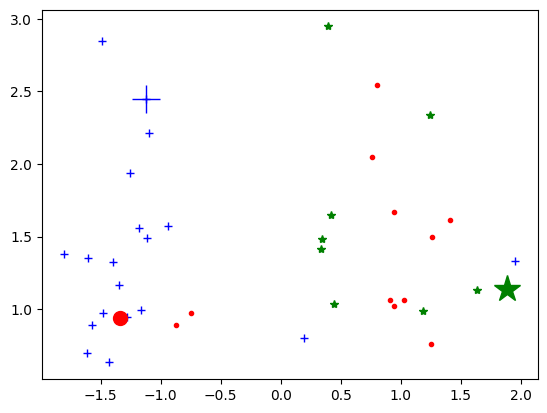

In [37]:
#绘制聚类结果图
X_pac_validation,clusterAssment,dataSet1 = datachange(X_pac_validation,y_pac_predict)
centroids = initCentroids(X_pac_validation, k)
showCluster(X_pac_validation, k, centroids, y_pac_predict)

In [38]:
#不进行主成分降维的数据聚类
X160_test = X.iloc[0:160,:]
X_validation = X.iloc[160:,:]
k = 3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X160_test,y160_test)
y_predict = knn.predict(X_validation)
#计算准确率
accuracy = accuracy_score(y_validation,y_predict)
print('准确率为：',accuracy)

#y_validation和y_predict在一个表格里columns为原始结果和预测结果
y_validation_frame = pd.DataFrame(y_validation,columns=['y_validation'])
y_predict_frame = pd.DataFrame(y_predict,columns=['y_predict'])
data2 = pd.concat([y_validation_frame,y_predict_frame],axis=1)
#如果y_validation和y_predict相等则为1，不等则为0
data2['result'] = data2.apply(lambda x: 1 if x['y_validation'] == x['y_predict'] else 0,axis=1)
data2.head()

准确率为： 0.4


,y_validation,y_predict,result
0,0,0,1
1,1,1,1
2,2,1,0
3,1,1,1
4,2,1,0


[0.525, 0.475, 0.5, 0.425, 0.475, 0.45, 0.45, 0.45, 0.45, 0.5, 0.475, 0.5, 0.475, 0.475, 0.45, 0.475, 0.475, 0.475, 0.45, 0.45, 0.45, 0.4, 0.45, 0.4, 0.425, 0.425, 0.475, 0.475, 0.475, 0.45]


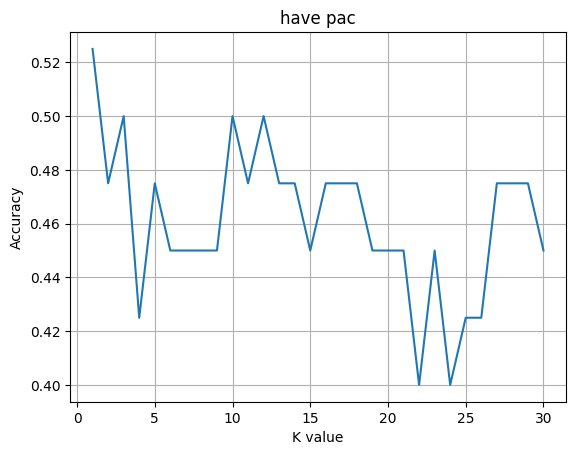

,accuracy,k
0,0.525,1
2,0.500,3
9,0.500,10
11,0.500,12
12,0.475,13


In [39]:
#选取X_pac前160数据
X160_pac_test = X_pca_frame.iloc[0:160,:]
X_pac_validation = X_pca_frame.iloc[160:,:]
#优化超参数k
k_range1 = range(1, 31)
k_scores1 = []
for k in k_range1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X160_pac_test,y160_test)
    y_pac_predict = knn.predict(X_pac_validation)
    accuracy_pac = accuracy_score(y_validation,y_pac_predict)
    k_scores1.append(accuracy_pac)
print(k_scores1)

#绘制k值与准确率的关系图
plt.plot(k_range1, k_scores1)
plt.grid(True)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('have pac')
plt.show()

#按准确率排序，找到相应的k值，放到一张表内
k_scores1 = pd.DataFrame(k_scores1,columns=['accuracy'])
k_scores1['k'] = k_range1
k_scores1 = k_scores1.sort_values(by='accuracy',ascending=False)
k_scores1.head()

[0.5, 0.4, 0.4, 0.45, 0.45, 0.4, 0.45, 0.45, 0.475, 0.5, 0.525, 0.55, 0.525, 0.6, 0.55, 0.575, 0.6, 0.525, 0.525, 0.525, 0.525, 0.55, 0.55, 0.525, 0.55, 0.525, 0.525, 0.5, 0.525, 0.55]


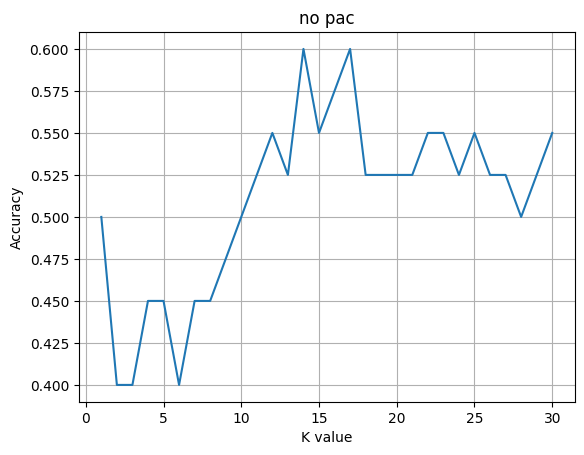

,accuracy,k
16,0.600,17
13,0.600,14
15,0.575,16
11,0.550,12
24,0.550,25


In [40]:
#不进行主成分降维的数据聚类
X160_test = X.iloc[0:160,:]
X_validation = X.iloc[160:,:]
#优化超参数k
k_range2 = range(1, 31)
k_scores2 = []
for k in k_range2:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X160_test,y160_test)
    y_predict = knn.predict(X_validation)
    accuracy = accuracy_score(y_validation,y_predict)
    k_scores2.append(accuracy)
print(k_scores2)

#绘制k值与准确率的关系图
plt.plot(k_range2, k_scores2)
plt.grid(True)
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('no pac')
plt.show()

#按准确率排序，找到相应的k值，放到一张表内
k_scores2 = pd.DataFrame(k_scores2,columns=['accuracy'])
k_scores2['k'] = k_range2
k_scores2 = k_scores2.sort_values(by='accuracy',ascending=False)
k_scores2.head()

In [41]:
#教材方法have pac
#将X160_pac_test转化为narray类型
X160_pac_test = np.array(X160_pac_test)
#将X_pac_validation转化为narray类型
X_pac_validation = np.array(X_pac_validation)
kNNClassify(X_pac_validation, X160_pac_test, y160_test, 3)

array([0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 0, 1, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1])